# 1-数组值求和

计算一个数组中所有元素的和
    
用内置的 sum 函数实现

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

46.08904715017951

In [3]:
# np 中的 sum函数,结果同上
np.sum(L)

46.089047150179525

In [4]:
# 注 NumPy 的 sum 函数在编译码中执行操作，所以 NumPy 的操作计算的更快
big_array = np.random.rand(10000)
%timeit sum(big_array)
%timeit np.sum(big_array)

804 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.51 µs ± 20.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


注意 sum 函数和 np.sum 函数并不等同
    
np.sum 函数是知道数组的维度的

# 2-最大值和最小值

In [5]:
# 同样 Python 有内置的 min 函数和 max 函数
min(big_array), max(big_array)

(0.00011731586768104485, 0.9999975801318369)

In [6]:
# NumPy 有对应的函数，但是执行的更快
np.min(big_array), np.max(big_array)

(0.00011731586768104485, 0.9999975801318369)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

576 µs ± 5.74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.35 µs ± 32.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


注 对 min，max，sum 和其他 NumPy 聚合，一个更加简洁的语法形式是数组对象直接调用

In [8]:
big_array.min(),big_array.max(),big_array.sum()

(0.00011731586768104485, 0.9999975801318369, 5008.37617018502)

In [9]:
M = np.random.random((3,4))
print(M)

[[0.35745675 0.81932321 0.16775385 0.47327769]
 [0.44296565 0.90718462 0.97591267 0.26675615]
 [0.21222415 0.17670134 0.79318452 0.56001154]]


在默认情况下，每一个 NumPy 聚合函数将会返回对整个数组的聚合

In [10]:
M.sum()

6.152752125473513

聚合函数还有一个重要的参数，用于指定沿着那个轴的方向进行聚合

In [11]:
# 通过指定 axis = 0 找到每一列的最小值
M.min(axis=0)

array([0.21222415, 0.17670134, 0.16775385, 0.26675615])

In [12]:
# 每一行的最大值
M.max(axis=1)

array([0.81932321, 0.97591267, 0.79318452])

# 其他聚合
    np.sum          np.nansum           计算元素的和
    np.prod         np.nanprod          计算元素的积
    np.mean         np.nanmean          计算元素的平均值
    np.std          np.nanstd           计算元素的标准差
    np.var          np.nanvar           计算元素的方差
    np.min          np.nanmin           找出最小值
    np.max          np.nanmax           找出最大值
    np.argmin       np.nanargmin        找出最小值的索引
    np.argmax       np.nanargmax        找出最大值的索引
    np.median       np.nanmedian        计算元素的中位数
    np.percentile   np.nanpercentile    计算基于元素排序的统计值
    np.any          N/A                 验证任何一个元素是否为真
    np.all          N/A                 验证所有元素是否为真

# 3-示例：美国总统的身高是多少

In [13]:
# 用 Pandas 包来读文件并抽取身高信息
import pandas as pd
data = pd.read_csv('../Data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [14]:
print("Mean height:          ", heights.mean())
print("Standard deviation:   ", heights.std())
print("Minimum height:       ", heights.min())
print("Maximum height:       ", heights.max())

Mean height:           179.73809523809524
Standard deviation:    6.931843442745892
Minimum height:        163
Maximum height:        193


In [15]:
# 在这个例子中，聚合操作将整个数组缩减到单个概括值，
# 这个概括值给出了这些数值的分布信息。我们也可以计算分位数
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


In [16]:
# 可视化
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()  # 设置绘图风格

Text(0, 0.5, 'number')

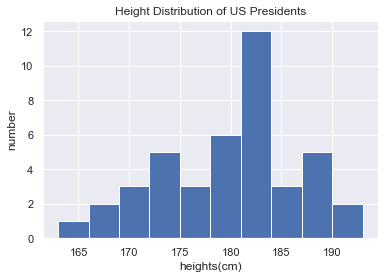

In [17]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('heights(cm)')
plt.ylabel('number')